In [15]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble.gradient_boosting import train_test_split

import os
import time
import datetime

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [16]:
#Importing the Data
digit_data = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [17]:
(X_train,X_val) = train_test_split(digit_data, test_size=.1)
y_train = X_train['label']
y_val = X_val['label']
X_train = X_train.drop('label', axis=1) / 255.0
X_val = X_val.drop('label', axis=1) / 255.0
X_test = X_test / 255.0

In [18]:
X_train.shape

(37800, 784)

In [19]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [20]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(300,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model1 = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(1000,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model2 = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(500,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model3 = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(300,activation='relu'),
    Dense(100,activation='relu'),
    Dense(300,activation='relu'),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])
model4 = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(200,activation='relu'),
    Dense(200,activation='relu'),
    Dense(200,activation='relu'),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

models = [model,model1,model2,model3,model4]

In [21]:
for m in models:
    m.compile(loss='sparse_categorical_crossentropy',
        optimizer='sgd',
        metrics=['accuracy'])

In [22]:
checkpoints = []
times = []
i = 0
for m in models:
    checkpoint_cb = keras.callbacks.ModelCheckpoint(f'my_keras_model{i}.h5', save_best_only=True)
    start_time = datetime.datetime.now()
    m.fit(X_train,y_train,
        epochs=40,
        validation_data=(X_val,y_val), callbacks=[checkpoint_cb])
    end_time = datetime.datetime.now()
    times.append(end_time-start_time)
    i+=1


1182/1182 [==============================] - 3s 3ms/step - loss: 0.0434 - accuracy: 0.9903 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 24/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0406 - accuracy: 0.9913 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 25/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0382 - accuracy: 0.9924 - val_loss: 0.0928 - val_accuracy: 0.9731
Epoch 26/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0357 - accuracy: 0.9924 - val_loss: 0.0922 - val_accuracy: 0.9719
Epoch 27/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0337 - accuracy: 0.9934 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 28/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0319 - accuracy: 0.9937 - val_loss: 0.0890 - val_accuracy: 0.9721
Epoch 29/40
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0298 - accuracy: 0.9943 - val_loss: 0.0867 - val_accuracy: 0.9

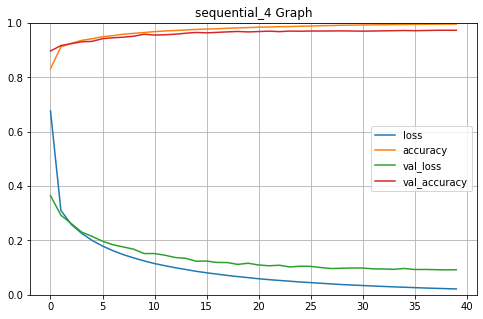

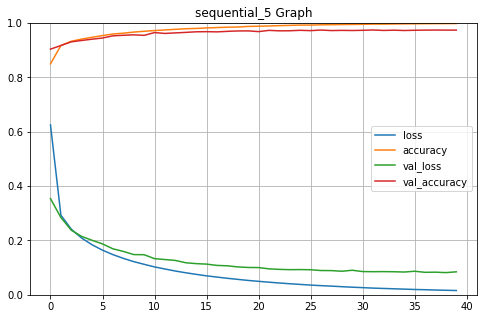

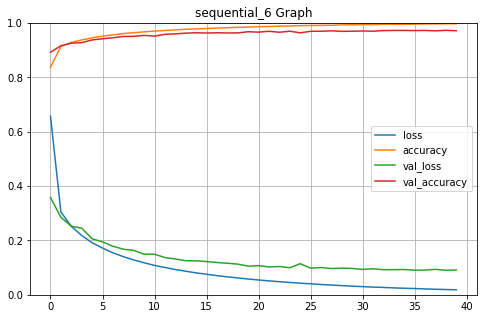

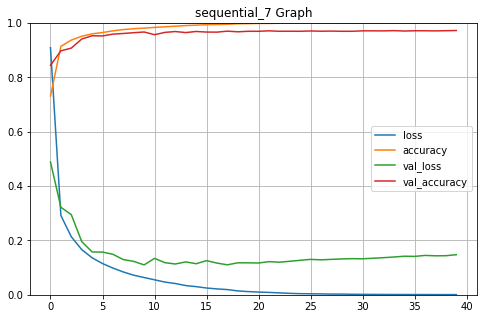

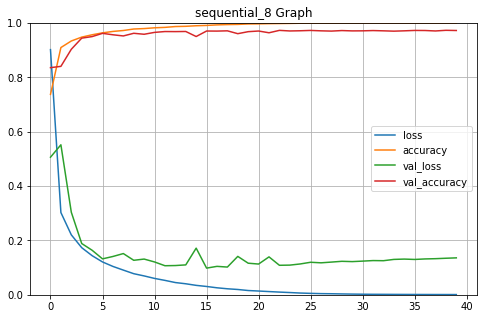

In [23]:
for m in models:
    pd.DataFrame(m.history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.title(f'{m._name} Graph')
plt.savefig('sequential_graphs.png')

In [24]:
losses = []
tst_losses = []
accuracys = []
tst_accuracys = []
for m in models:
    (loss,acc) = m.evaluate(X_train,y_train)
    (tst_loss,tst_acc) = m.evaluate(X_val, y_val)
    losses.append(loss)
    tst_losses.append(tst_loss)
    accuracys.append(acc)
    tst_accuracys.append(tst_acc)


132/132 [==============================] - 0s 667us/step - loss: 0.1359 - accuracy: 0.9724


In [25]:
d = {'model_name': ['1','2','3','4','5'], 
    'nodes_in_layers': [[300,100],[1000,100],[500,100],[300,100,300,100,100],[200,200,200,100,100]],
    'num_layers':[2,2,2,5,5],
    'process_time': times,
    'trng_accr': accuracys,
    'tst_accr': tst_accuracys}
results_df = pd.DataFrame(d)

In [26]:
tst_predictions = []
for m in models:
    test_prediction = m.predict(X_test)
    test_predictions_classes = np.argmax(m.predict(X_test), axis=-1)
    tst_predictions.append(test_predictions_classes)

In [27]:
for i in range(len(models)):
    results = pd.DataFrame(tst_predictions[i])
    results.index = np.arange(1, len(results) + 1)
    results.to_csv(f'{i}_model_results.csv')

Lets try a different activation function (selu) and optimizer (adam).

In [40]:
# selu model
model5 = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    Dense(10,activation='softmax')
])
model5.compile(loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
model5.fit(X_train,y_train, epochs=50,
    validation_data=(X_val,y_val))


Epoch 1/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3466 - accuracy: 0.8960 - val_loss: 0.2334 - val_accuracy: 0.9336
Epoch 2/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2004 - accuracy: 0.9395 - val_loss: 0.2132 - val_accuracy: 0.9364
Epoch 3/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1525 - accuracy: 0.9529 - val_loss: 0.1767 - val_accuracy: 0.9495
Epoch 4/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1330 - accuracy: 0.9611 - val_loss: 0.1600 - val_accuracy: 0.9543
Epoch 5/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1135 - accuracy: 0.9653 - val_loss: 0.1814 - val_accuracy: 0.9550
Epoch 6/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1021 - accuracy: 0.9690 - val_loss: 0.1584 - val_accuracy: 0.9560
Epoch 7/50
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0939 - accuracy: 0.9725 - val_loss: 0.1283 - val_accuracy:

In [43]:
(loss,acc) = model5.evaluate(X_train,y_train)
(tst_loss,tst_acc) = m.evaluate(X_val, y_val)
losses.append(loss)
tst_losses.append(tst_loss)
accuracys.append(acc)
tst_accuracys.append(tst_acc)

132/132 [==============================] - 0s 727us/step - loss: 0.1359 - accuracy: 0.9724


TypeError: append() takes from 2 to 5 positional arguments but 7 were given

In [52]:
results_df = results_df.append({'model_name': 6, 
    'nodes_in_layers':[200,200,200,200,200],
    'num_layers': 5,
    'process_time': times[4],
    'trng_accr': acc,
    'tst_accr': tst_acc}, ignore_index=True)

In [39]:
model5_predictions = np.argmax(model5.predict(X_test), axis=-1)
results = pd.DataFrame(model5_predictions)
results.index = np.arange(1, len(results) + 1)
results.to_csv(f'model5_results.csv')

# Summary
## Kaggle Team Name: Digit Finders


Our results were very favorable for relu in the 97th percentile for test accuracy. You can see a representative summary in our results_df dataframe, shown in the next codeblock. While experimenting with RandomSearch Parameters, we ran into a RunTimeError with overriding the build_model variable. We weren't able to overcome this hurdle. We did try selu activation with adam optimizer. This ended up being our highest scoring model. It's our recommendation to management that we spend more time with hyperparameter optimization to allow better tuning of the model for the last 3 percent. I know we can get there. We were tuning the number of hidden layers, the number of neurons and the learning_rate.  I will leave our error'd code attached at the end of this so as to showcase our work on building this build_model method. Please note that the error doesn't become an issue until after a few hundred epochs making it difficult to troublshoot as it would fail an hour into run.

## Model Accuracy Results

In [53]:
results_df

,model_name,nodes_in_layers,num_layers,process_time,trng_accr,tst_accr
0,1,"[300, 100]",2,00:00:52.422825,0.997328,0.973095
1,2,"[1000, 100]",2,00:02:13.950175,0.997804,0.973810
2,3,"[500, 100]",2,00:01:23.957501,0.997936,0.971667
3,4,"[300, 100, 300, 100, 100]",5,00:01:06.567133,1.000000,0.972381
4,5,"[200, 200, 200, 100, 100]",5,00:01:03.113013,1.000000,0.972381
5,6,"[200, 200, 200, 200, 200]",5,00:01:03.113013,0.996958,0.972381


# Start of Error'd Code

In [31]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[784]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [32]:
#Build log files and tensorboard callbacks
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [33]:
#Fine-Tuning Neural Network Hyperparameters with inclusions into Tensorboards's input
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100),
    'learning_rate': reciprocal(3e-4,3e-2)
}

rnd_serach_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)

rnd_serach_cv.fit(X_train, y_train,
    epochs = 100,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

==] - 0s 569us/step - loss: 2.5692 - val_loss: 2.6690
Epoch 46/100
788/788 [==============================] - 0s 575us/step - loss: 2.5551 - val_loss: 2.6306
Epoch 47/100
788/788 [==============================] - 0s 567us/step - loss: 2.5447 - val_loss: 2.6218
Epoch 48/100
788/788 [==============================] - 0s 565us/step - loss: 2.5306 - val_loss: 2.6133
Epoch 49/100
788/788 [==============================] - 0s 567us/step - loss: 2.5202 - val_loss: 2.6069
Epoch 50/100
788/788 [==============================] - 0s 584us/step - loss: 2.5056 - val_loss: 2.5922
Epoch 51/100
788/788 [==============================] - 0s 579us/step - loss: 2.4899 - val_loss: 2.5760
Epoch 52/100
788/788 [==============================] - 0s 564us/step - loss: 2.4740 - val_loss: 2.5655
Epoch 53/100
788/788 [==============================] - 0s 576us/step - loss: 2.4630 - val_loss: 2.5376
Epoch 54/100
788/788 [==============================] - 0s 571us/step - loss: 2.4483 - val_loss: 2.5201
Epoch 55/1

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000241379D9880>, as the constructor either does not set or modifies parameter learning_rate